# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr


In [ ]:
data = datasets.load_breast_cancer()
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
bcdf = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])#Breast cancer data frame
bcdf.head()#if target  = 0 Malignant, if target = 1 Benign

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
bcdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
train_df, test_df = train_test_split(bcdf)  #default for shuffle is True #75% train is default
print(len(train_df),len(test_df))

display(train_df)

426 143


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842,1.0
116,8.95,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.15440,0.03846,0.1652,0.07722,1.0
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.06018,0.1896,0.05656,...,29.02,133.50,1229.0,0.1563,0.3835,0.54090,0.18130,0.4863,0.08633,0.0
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.02100,0.1601,0.05913,...,36.32,85.07,521.3,0.1453,0.1622,0.18110,0.08698,0.2973,0.07745,1.0
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,13.77,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.06526,0.1834,0.06877,...,34.01,111.60,806.9,0.1737,0.3122,0.38090,0.16730,0.3080,0.09333,0.0
189,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.01654,0.1667,0.05474,...,19.59,86.65,546.7,0.1096,0.1650,0.14230,0.04815,0.2482,0.06306,1.0
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.04938,0.2075,0.05636,...,29.25,108.40,808.9,0.1306,0.1976,0.33490,0.12250,0.3020,0.06846,0.0
247,12.89,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.03980,0.1596,0.06409,...,17.70,105.00,639.1,0.1254,0.5849,0.77270,0.15610,0.2639,0.11780,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


DT score :  0.916083916083916


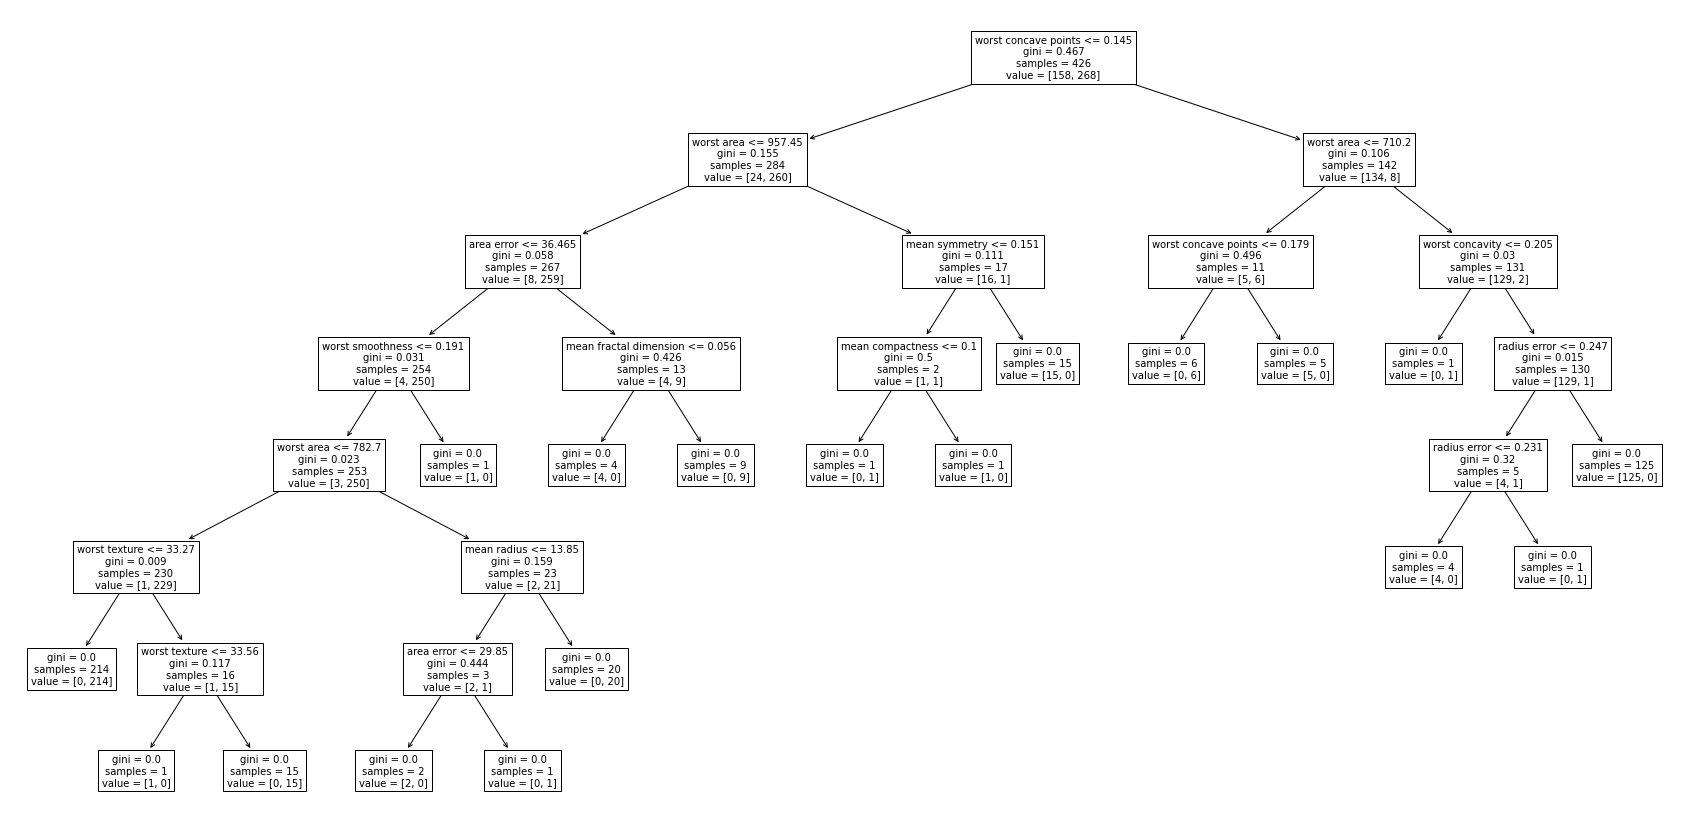

In [ ]:
tree = DecisionTreeClassifier()

tree.fit(train_df.drop('target', axis=1), train_df['target'])   #equivalent to tree.fit(X,y)

score = tree.score(test_df.drop('target', axis=1), test_df['target']) #score on the test data
print("DT score : ",score)

pyplot.figure(figsize=(30,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [ ]:

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}

column_names = train_df.columns

for  i in range(len(column_names)-1):
    feature_importance_sk[column_names[i]] = importances_sk[i]

top5 = {}

a = list(feature_importance_sk.values())
a.sort(reverse = True)
print("top 5 most important (discriminative) features\n")

no = 1
for j in a[:5]:
  index = list(feature_importance_sk.values()).index(j)
  key = list(feature_importance_sk.keys())[index]
  top5[key] = j
  print(str(no)+". "+key+" : ",j)
  no+=1

  




top 5 most important (discriminative) features

1. worst concave points :  0.7304415780705219
2. worst area :  0.16363937311276047
3. mean fractal dimension :  0.027859727651906002
4. area error :  0.01731130687763147
5. mean radius :  0.011664298211748084


In [ ]:
#Malignant people has a high value than Benign people in most feature.

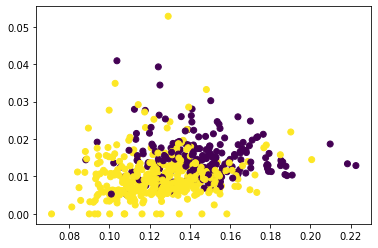

In [ ]:
pyplot.scatter(bcdf['worst smoothness'],bcdf['concave points error'], c = bcdf['target'])

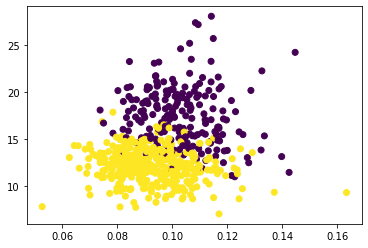

In [ ]:
pyplot.scatter(bcdf['mean smoothness'],bcdf['mean radius'], c = bcdf['target'])

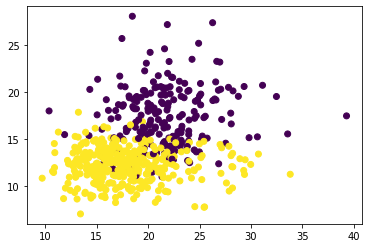

In [ ]:
pyplot.scatter(bcdf['mean texture'],bcdf['mean radius'], c = bcdf['target'])

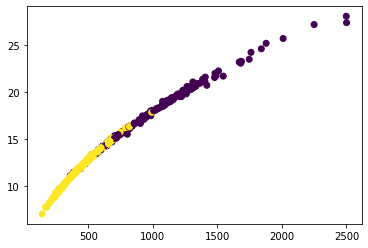

In [ ]:
pyplot.scatter(bcdf['mean area'],bcdf['mean radius'], c = bcdf['target'])

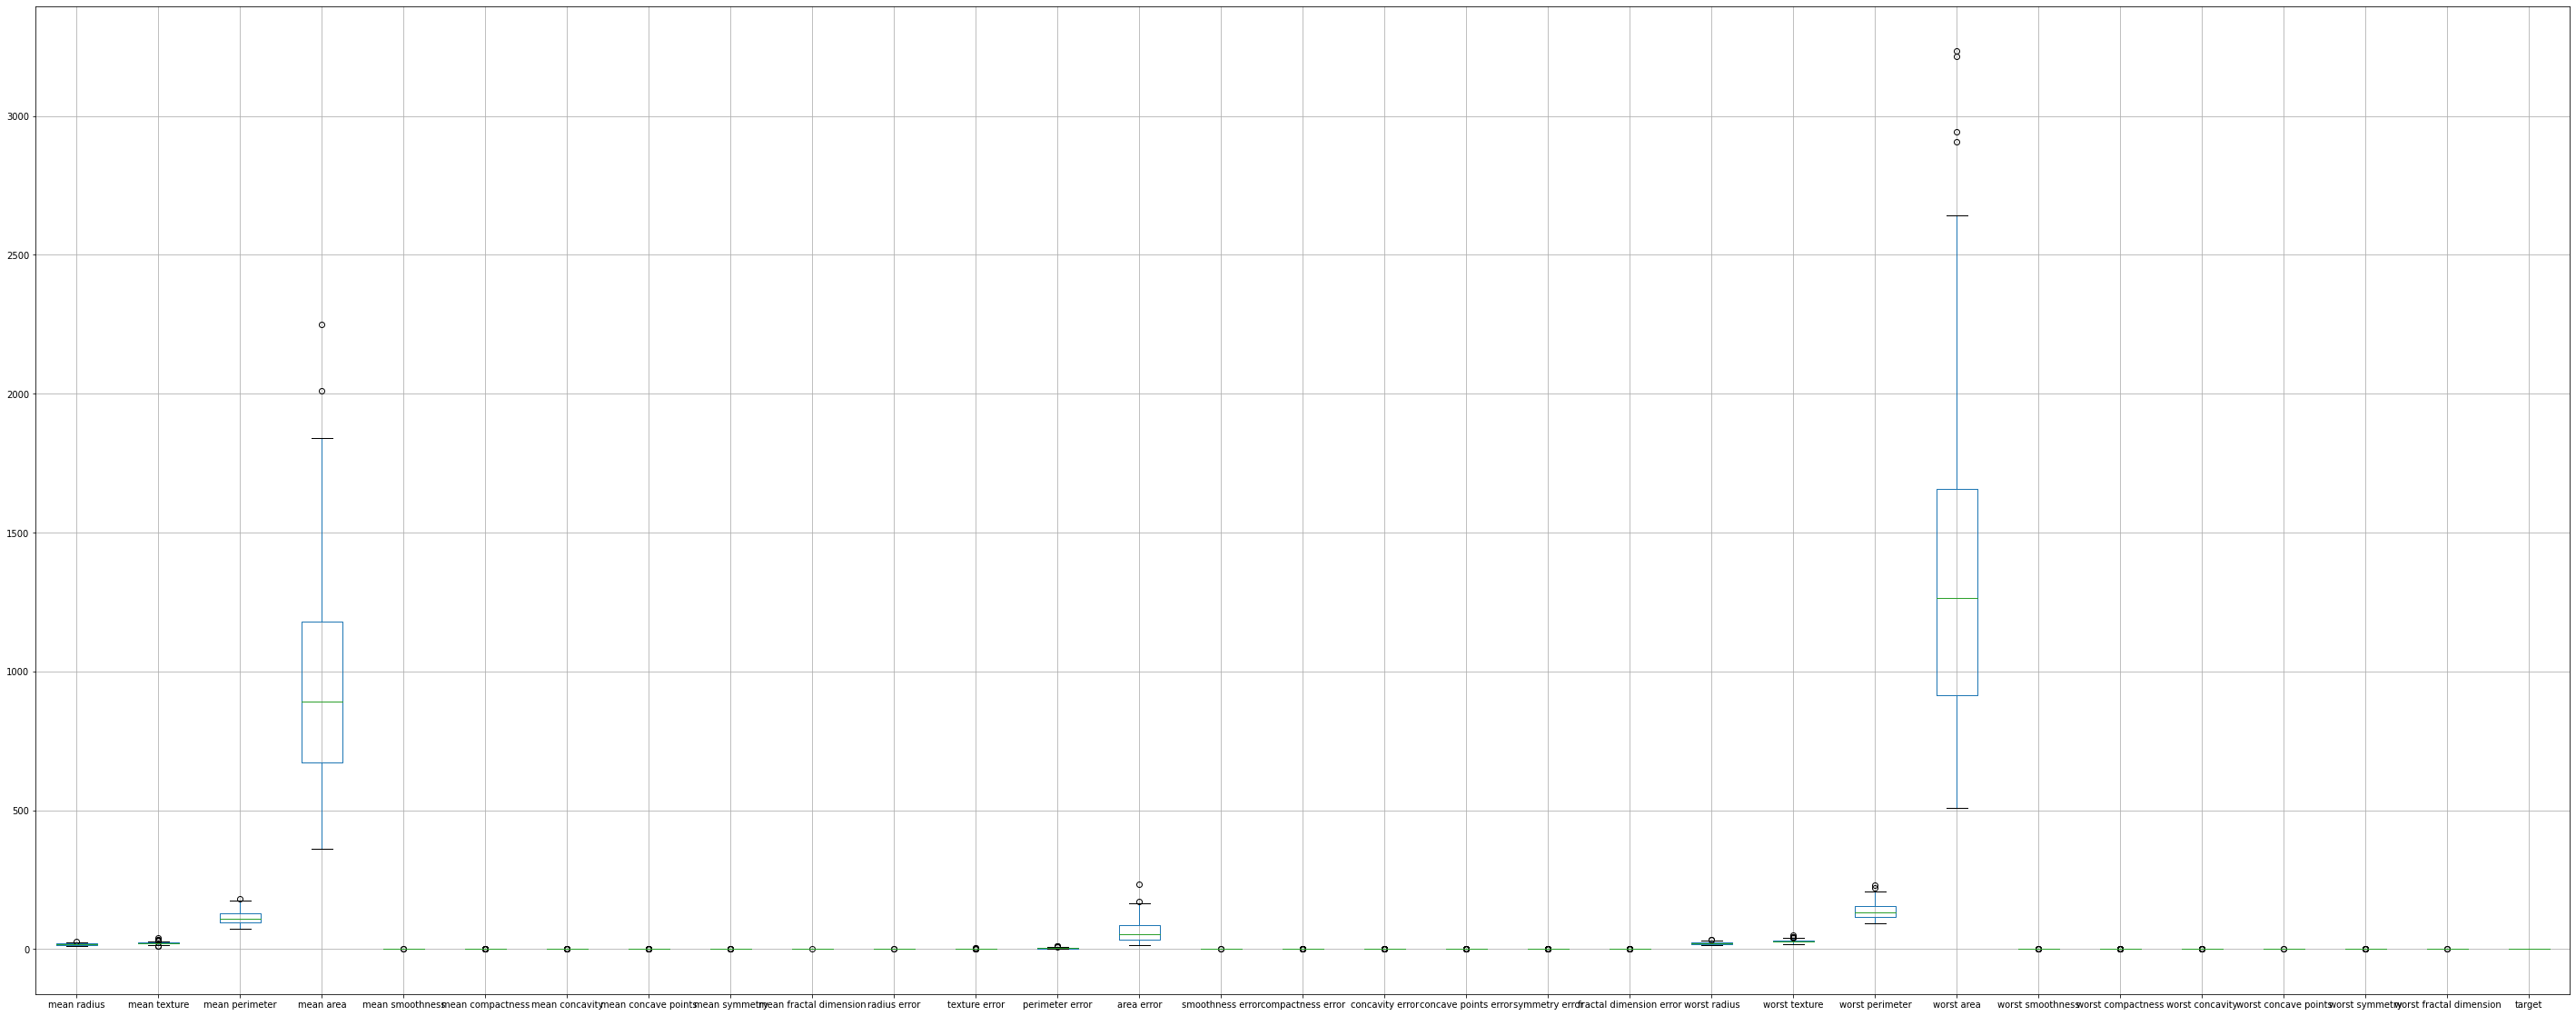

In [ ]:
pyplot.figure(figsize=(50,20))
train_df[train_df['target']==0].boxplot()   
#A boxplot graphs shows us a good indication of how the values in the data are spread out.

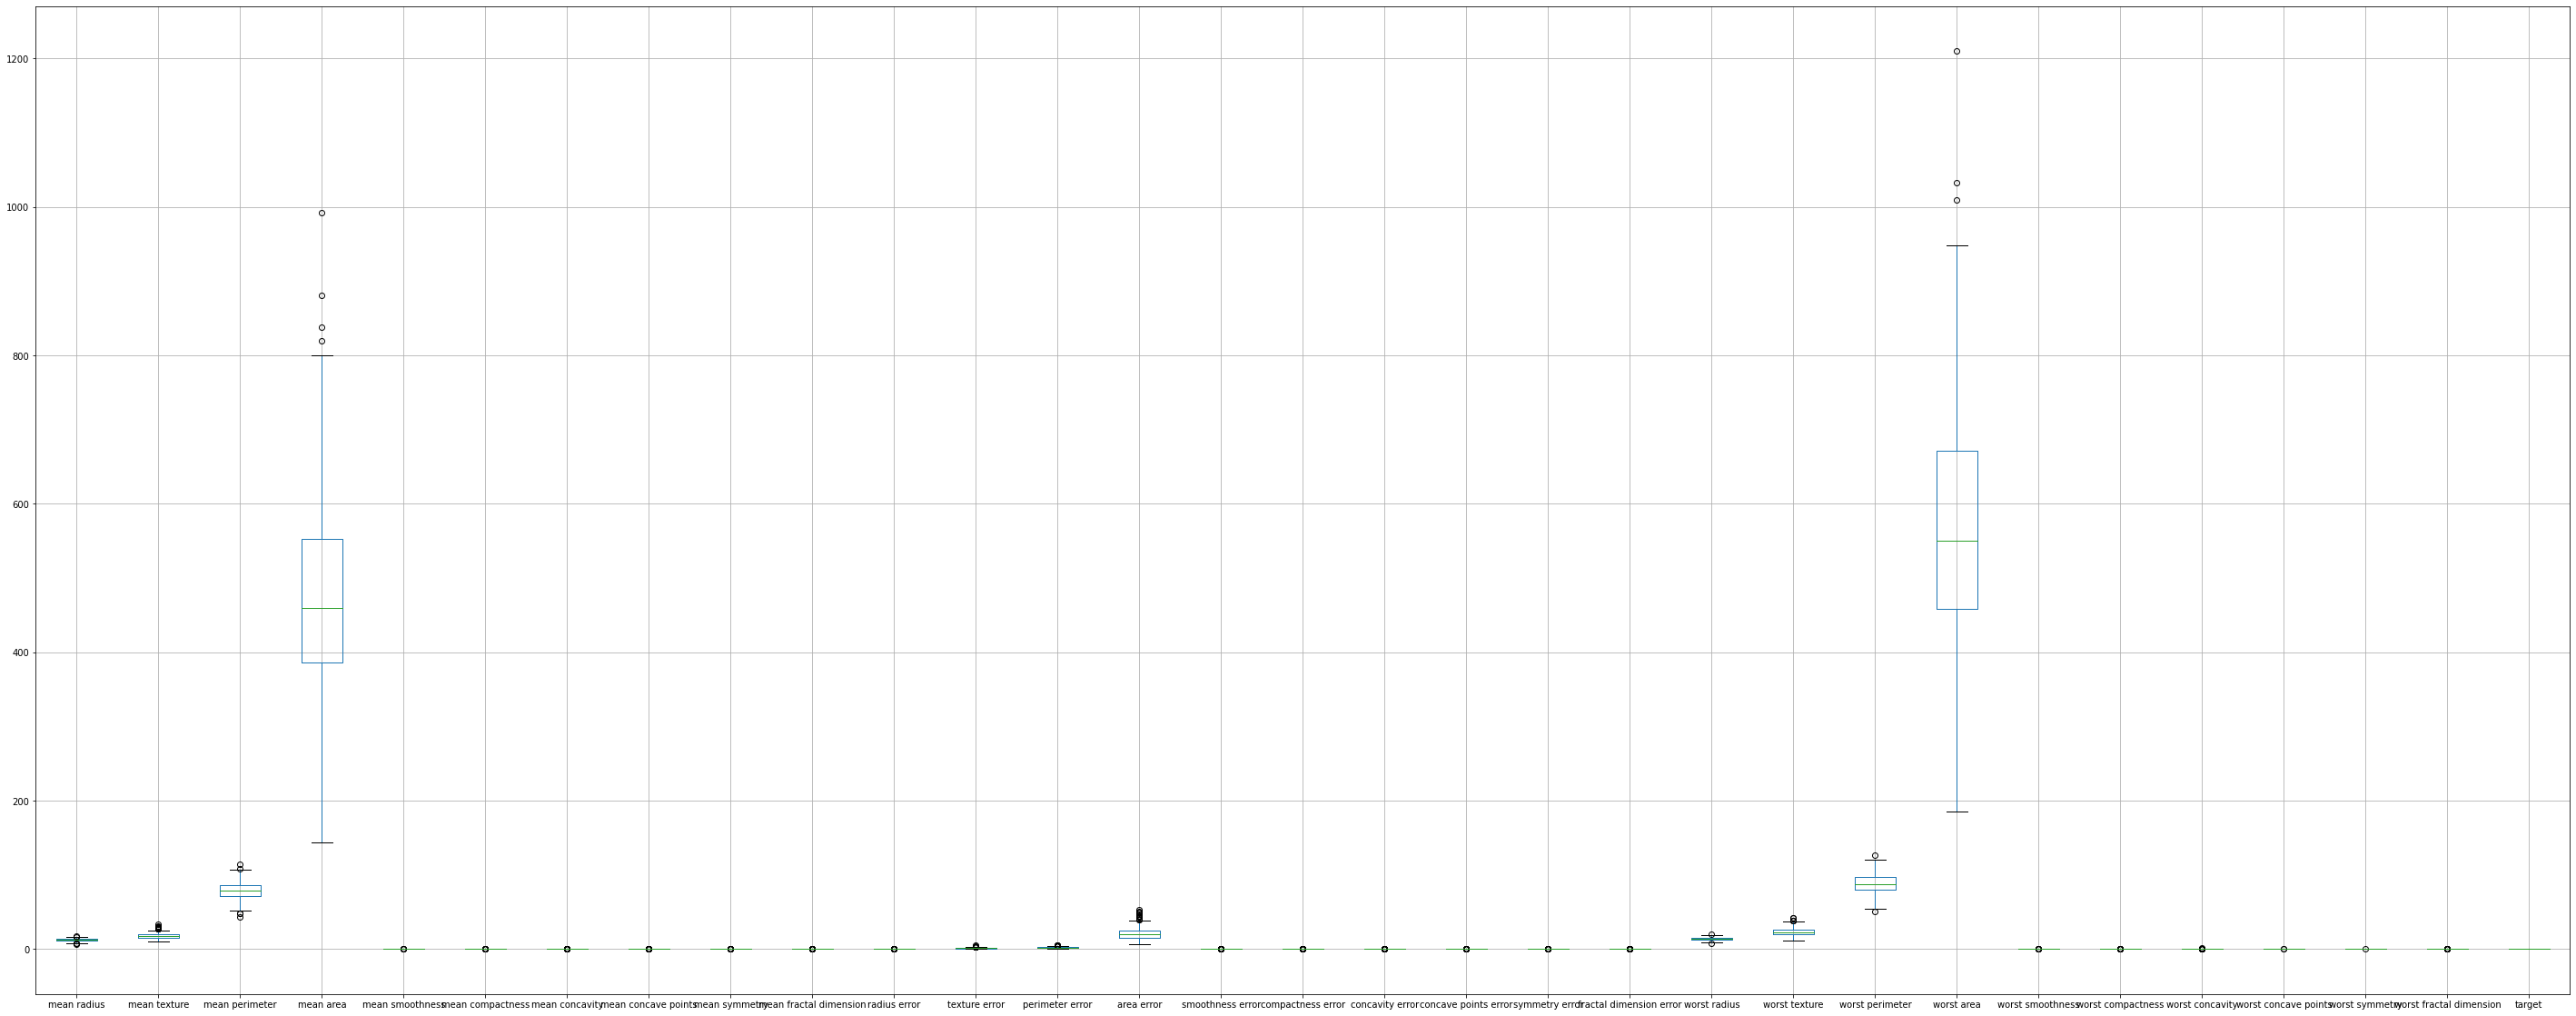

In [ ]:
pyplot.figure(figsize=(50,20))
train_df[train_df['target']==1].boxplot() 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x1080 with 0 Axes>

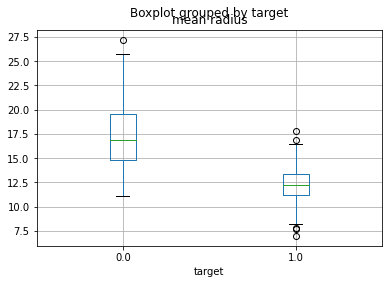

In [ ]:
pyplot.figure(figsize=(15,15))
train_df.boxplot(column = "mean radius", by = "target") #People who has Malignant cancer have a larger mean radius than people who has Benign cancer

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x1080 with 0 Axes>

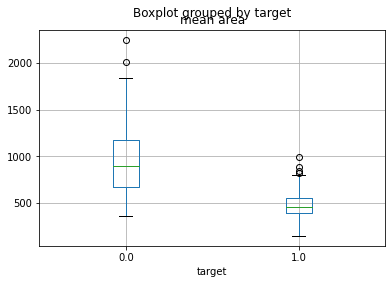

In [ ]:
pyplot.figure(figsize=(15,15))
train_df.boxplot(column = "mean area", by = "target") #People who has Malignant cancer have a larger mean area than people who has Benign cancer

In [ ]:
lr = LogisticRegression(C = 0.01, max_iter=1000)
lr.fit(train_df.drop('target', axis=1), train_df['target'])

sc = lr.score(test_df.drop('target', axis=1), test_df['target'])
print("Logistic Regression score : ", sc)

Logistic Regression score :  0.958041958041958


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#Logistic regression slightly perform better than decision tree.

### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [ ]:
wine_df = pd.read_csv("winequality_white.csv", sep = ";")

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
train_wine_df, test_wine_df = train_test_split(wine_df)

In [ ]:
tree_reg = DecisionTreeRegressor(min_samples_split =30, max_depth = 20) 
tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])

tree_reg.score(test_wine_df.drop('quality',axis=1),test_wine_df['quality'])



0.21083120306481684

In [ ]:
tree_reg = DecisionTreeRegressor(min_samples_split =40, max_depth = 40) 
tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])

tree_reg.score(test_wine_df.drop('quality',axis=1),test_wine_df['quality'])

0.25907161331882744

In [ ]:
tree_reg = DecisionTreeRegressor(min_samples_split =50, max_depth = 50) 
tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])

tree_reg.score(test_wine_df.drop('quality',axis=1),test_wine_df['quality'])
#my best variables are min_samples_split =50, max_depth = 50 but when there is inconsistency between the two parameter overfitting and underfitting happen.

0.26789243612983693

In [ ]:
mse = mean_squared_error(tree_reg.predict(test_wine_df.drop('quality',axis=1)), test_wine_df['quality'])
print("Mean Squared Error on Test set : ",mse)

Mean Squared Error on Test set :  0.5599148891110391
